<div style="text-align:center; border: 1px solid #808080; padding: 10px;">
  <h1 style="color: gray; font-weight: bold;">Credit Card Predictive Analysis | EDA:</h1>
  <h2 style="color: gray; font-weight: bold;">Credit Risk Classification Using  Model of Best Fit</h2>
</div>

# **Problem Statement**

Credit score cards are used in the financial industry to predict the likelihood of credit card defaults and guide the issuance of credit cards. These scores rely on applicants' personal data and historical information, quantifying risk objectively.

What Business need ????:¶
"The objective of the project is to build a model that predicts whether an individual is eligible for Credit Card Approval or not."
**This project wants to create Random Forest Classifier Model to help banks decide who should get a credit card.**

## Huggingface model samples
- aegishield/credit_card_purchase_prediction
- timhbach/Team-Gryffindor-DistilBERT-finetuned-ner-creditcardcontract
- PabitraJiban/Credit-card-collection-intent-classification

## Load libraries & helpers

In [21]:
import os
import sys
import importlib
from autoviz import AutoViz_Class

sys.path.append("../scripts")
from data_processing_framework import *
from ml_pipeline_utils import *

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


## Data load & understanding

In [5]:
# load dataset 1
appl_df = fetch_kaggle_dataset(search_query="credit-card-approval-prediction")


🔹 Available Datasets:

Dataset 1: rikdifos/credit-card-approval-prediction - Credit Card Approval Prediction
Files:
  - application_record.csv (Size: 54342959 bytes)
  - credit_record.csv (Size: 15367102 bytes)

Dataset 2: caesarmario/application-data - Credit Card Approval Prediction (Cleaned Version)
Files:
  - Application_Data.csv (Size: 7712142 bytes)

Dataset 3: rohitudageri/credit-card-details - Credit card Details Binary Classification Problem
Files:
  - Credit_card.csv (Size: 186815 bytes)
  - Credit_card_label.csv (Size: 17042 bytes)

Dataset 4: laotse/credit-card-approval - Credit Card Approval - With Target
Files:
  - credit_card_approval.csv (Size: 69493242 bytes)

Dataset 5: pranaybshah/credit-card-approval-prediction-dataset - Credit Card Approval Prediction Dataset
Files:
  - Credit_card.csv (Size: 186815 bytes)
  - Credit_card_label.csv (Size: 17042 bytes)



Enter the number of the dataset you want to use:  1



🔹 Available Files:
1. application_record.csv (Size: 54342959 bytes)
2. credit_record.csv (Size: 15367102 bytes)



Enter the number of the file you want to use:  1


✅ Successfully read with utf-8 encoding

✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 

In [14]:
# load dataset 2
credits_df = fetch_kaggle_dataset(search_query="credit-card-approval-prediction")


🔹 Available Datasets:

Dataset 1: rikdifos/credit-card-approval-prediction - Credit Card Approval Prediction
Files:
  - application_record.csv (Size: 54342959 bytes)
  - credit_record.csv (Size: 15367102 bytes)

Dataset 2: caesarmario/application-data - Credit Card Approval Prediction (Cleaned Version)
Files:
  - Application_Data.csv (Size: 7712142 bytes)

Dataset 3: rohitudageri/credit-card-details - Credit card Details Binary Classification Problem
Files:
  - Credit_card.csv (Size: 186815 bytes)
  - Credit_card_label.csv (Size: 17042 bytes)

Dataset 4: laotse/credit-card-approval - Credit Card Approval - With Target
Files:
  - credit_card_approval.csv (Size: 69493242 bytes)

Dataset 5: pranaybshah/credit-card-approval-prediction-dataset - Credit Card Approval Prediction Dataset
Files:
  - Credit_card.csv (Size: 186815 bytes)
  - Credit_card_label.csv (Size: 17042 bytes)



Enter the number of the dataset you want to use:  1



🔹 Available Files:
1. application_record.csv (Size: 54342959 bytes)
2. credit_record.csv (Size: 15367102 bytes)



Enter the number of the file you want to use:  2


✅ Successfully read with utf-8 encoding

✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


---
Application df: 
- 438557 entries, 0 to 438556
- Data columns (total 18 columns):
----
Credit df:
- 1048575 entries, 0 to 1048574
- Data columns (total 3 columns

| Feature Name    | Explanation     | Remarks                                                                                       |
|-----------------|-----------------|-----------------------------------------------------------------------------------------------|
| MONTHS_BALANCE  | Record month    | The month of the extracted data is the starting point, backwards, `0 is the current month`, `-1 is the previous month`, and so on |
| STATUS          | Status          | `0: 1-29 days past due` `1: 30-59 days past due` `2: 60-89 days overdue` `3: 90-119 days overdue` `4: 120-149 days overdue` `5: Overdue or bad debts, write-offs for more than 150 days` `C: paid off that month` `X: No loan for the month` |

---

## Creating the target variable

---
To create the target column Is_high_risk (binary: 1 for risky, 0 for not risky),

- Step 1: Define Risky Statuses: Based on the STATUS column, classify customers as "risky" if they have ever had a severe delinquency (e.g., 60+ days overdue). Common thresholds include:
- > STATUS = 2, 3, 4, or 5 (60+ days past due).

- Step 2: Aggregate Customer Behavior: Group the data by ID and check if the customer has any risky status in their history:
- I will merge the two dataframes based on the `ID` column, using the `inner` parameter in the `pd.merge` function.
- ---

In [27]:
# Define risky statuses (adjust threshold as needed)
risky_statuses = {'2', '3', '4', '5'}

In [32]:
# Group by ID and check if they EVER had a risky status
target_df = credits_df.groupby('ID')['STATUS'].apply(
    lambda s: 1 if s.isin(risky_statuses).any() else 0
).reset_index(name='is_high_risk')

In [33]:
# Filter for the most recent application (MONTHS_BALANCE=0)
latest_data = credits_df[credits_df['MONTHS_BALANCE'] == 0].copy()

# Drop duplicate IDs (if any)
latest_data = latest_data.drop_duplicates(subset='ID', keep='first')

In [41]:
# Merge target variable with latest application data
merged_df = appl_df.merge(latest_data, on='ID', how='inner')
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Is_high_risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C,0


In [42]:
detect_columns(merged_df)

,Category,Columns,Count
0,Dates,[],0
1,Numerical,"[ID, CNT_CHILDREN, AMT_INCOME_TOTAL, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, MONTHS_BALANCE, Is_high_risk]",12
2,Binary,"[CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY]",3
3,Multi-Category,"[NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, STATUS]",5
4,Irrelevant,[OCCUPATION_TYPE],1


**Column Description of Merged Dataset:**

| Feature Name        | Explanation                  | Remarks                                                  |
|---------------------|------------------------------|----------------------------------------------------------|
| ID                  | Client number                |                                                          |
| CODE_GENDER         | Gender                       |                                                          |
| FLAG_OWN_CAR        | Is there a car               |                                                          |
| FLAG_OWN_REALTY     | Is there a property          |                                                          |
| CNT_CHILDREN        | Number of children           |                                                          |
| AMT_INCOME_TOTAL    | Annual income                |                                                          |
| NAME_INCOME_TYPE    | Income category              |                                                          |
| NAME_EDUCATION_TYPE | Education level              |                                                          |
| NAME_FAMILY_STATUS  | Marital status               |                                                          |
| NAME_HOUSING_TYPE   | Way of living (House Type)                |                                                          |
| DAYS_BIRTH          | Birthday                     | Count backwards from current day (0), -1 means yesterday |
| DAYS_EMPLOYED       | Start date of employment     | Count backwards from current day(0). If positive, it means the person is currently unemployed. |
| FLAG_MOBIL          | Is there a mobile phone      |                                                          |
| FLAG_WORK_PHONE     | Is there a work phone        |                                                          |
| FLAG_PHONE          | Is there a phone             |                                                          |
| FLAG_EMAIL          | Is there an email            |                                                          |
| OCCUPATION_TYPE     | Occupation                   |                                                          |
| CNT_FAM_MEMBERS     | Family size                  |                                                          |


## Initial EDA / Data Quality Checks

Shape of your Data Set loaded: (24672, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']
    Integer-Categorical Columns: ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
    String-Categorical Columns: ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'STATUS']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
    Numeric-Boolean Columns: ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['ID']
    Columns that

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
CODE_GENDER,object,0.000000,0,,,No issue
FLAG_OWN_CAR,object,0.000000,0,,,No issue
FLAG_OWN_REALTY,object,0.000000,0,,,No issue
CNT_CHILDREN,int64,0.000000,0,0.000000,19.000000,"Column has 205 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them., Column has a high correlation with ['CNT_FAM_MEMBERS']. Consider dropping one of them."
AMT_INCOME_TOTAL,float64,0.000000,NA,27000.000000,1575000.000000,Column has 496 outliers greater than upper bound (387000.00) or lower than lower bound(-45000.00). Cap them or remove them.
NAME_INCOME_TYPE,object,0.000000,0,,,1 rare categories: ['Student']. Group them into a single category or drop the categories.
NAME_EDUCATION_TYPE,object,0.000000,0,,,1 rare categories: ['Academic degree']. Group them into a single category or drop the categories.
NAME_FAMILY_STATUS,object,0.000000,0,,,No issue
NAME_HOUSING_TYPE,object,0.000000,0,,,"2 rare categories: ['Office apartment', 'Co-op apartment']. Group them into a single category or drop the categories."
DAYS_BIRTH,int64,0.000000,49,-25152.000000,-7489.000000,No issue


Total Number of Scatter Plots = 3
All Plots are saved in reports_html\Is_high_risk
Time to run AutoViz = 17 seconds 


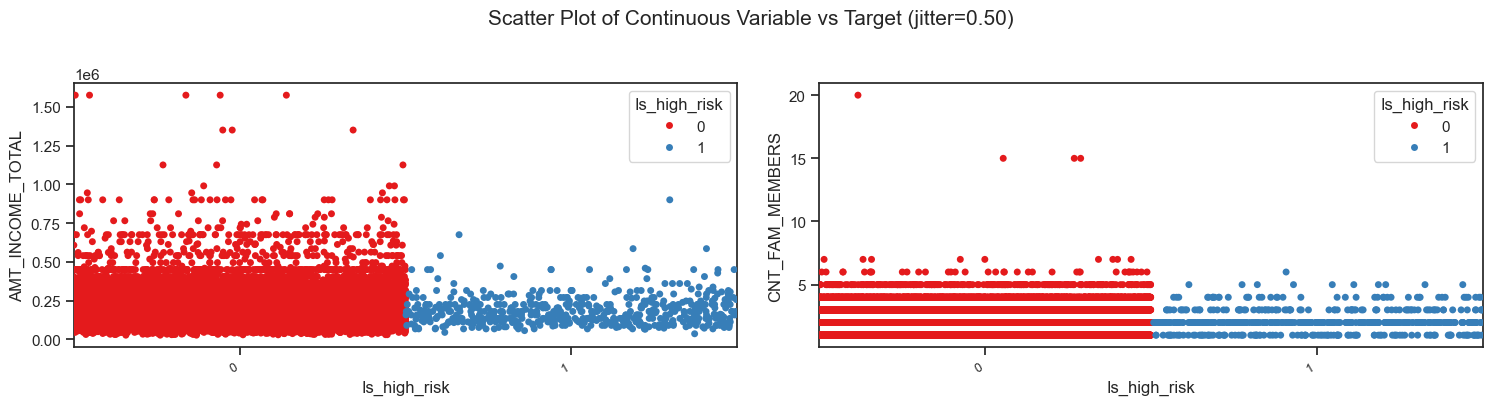

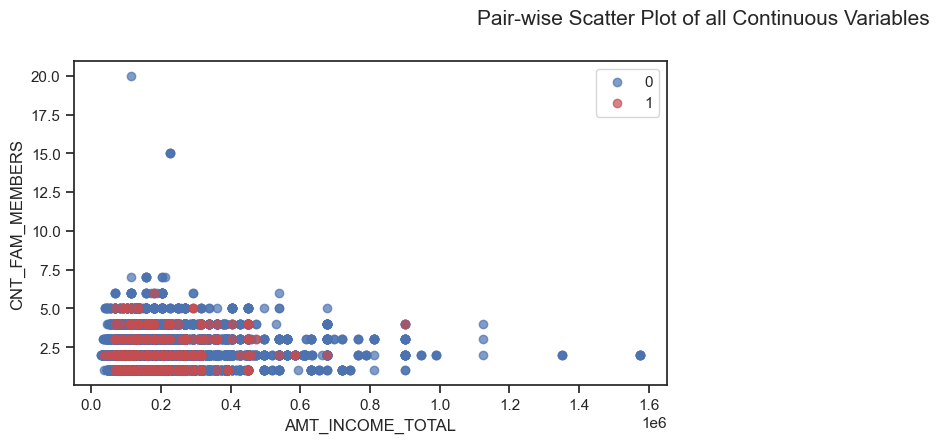

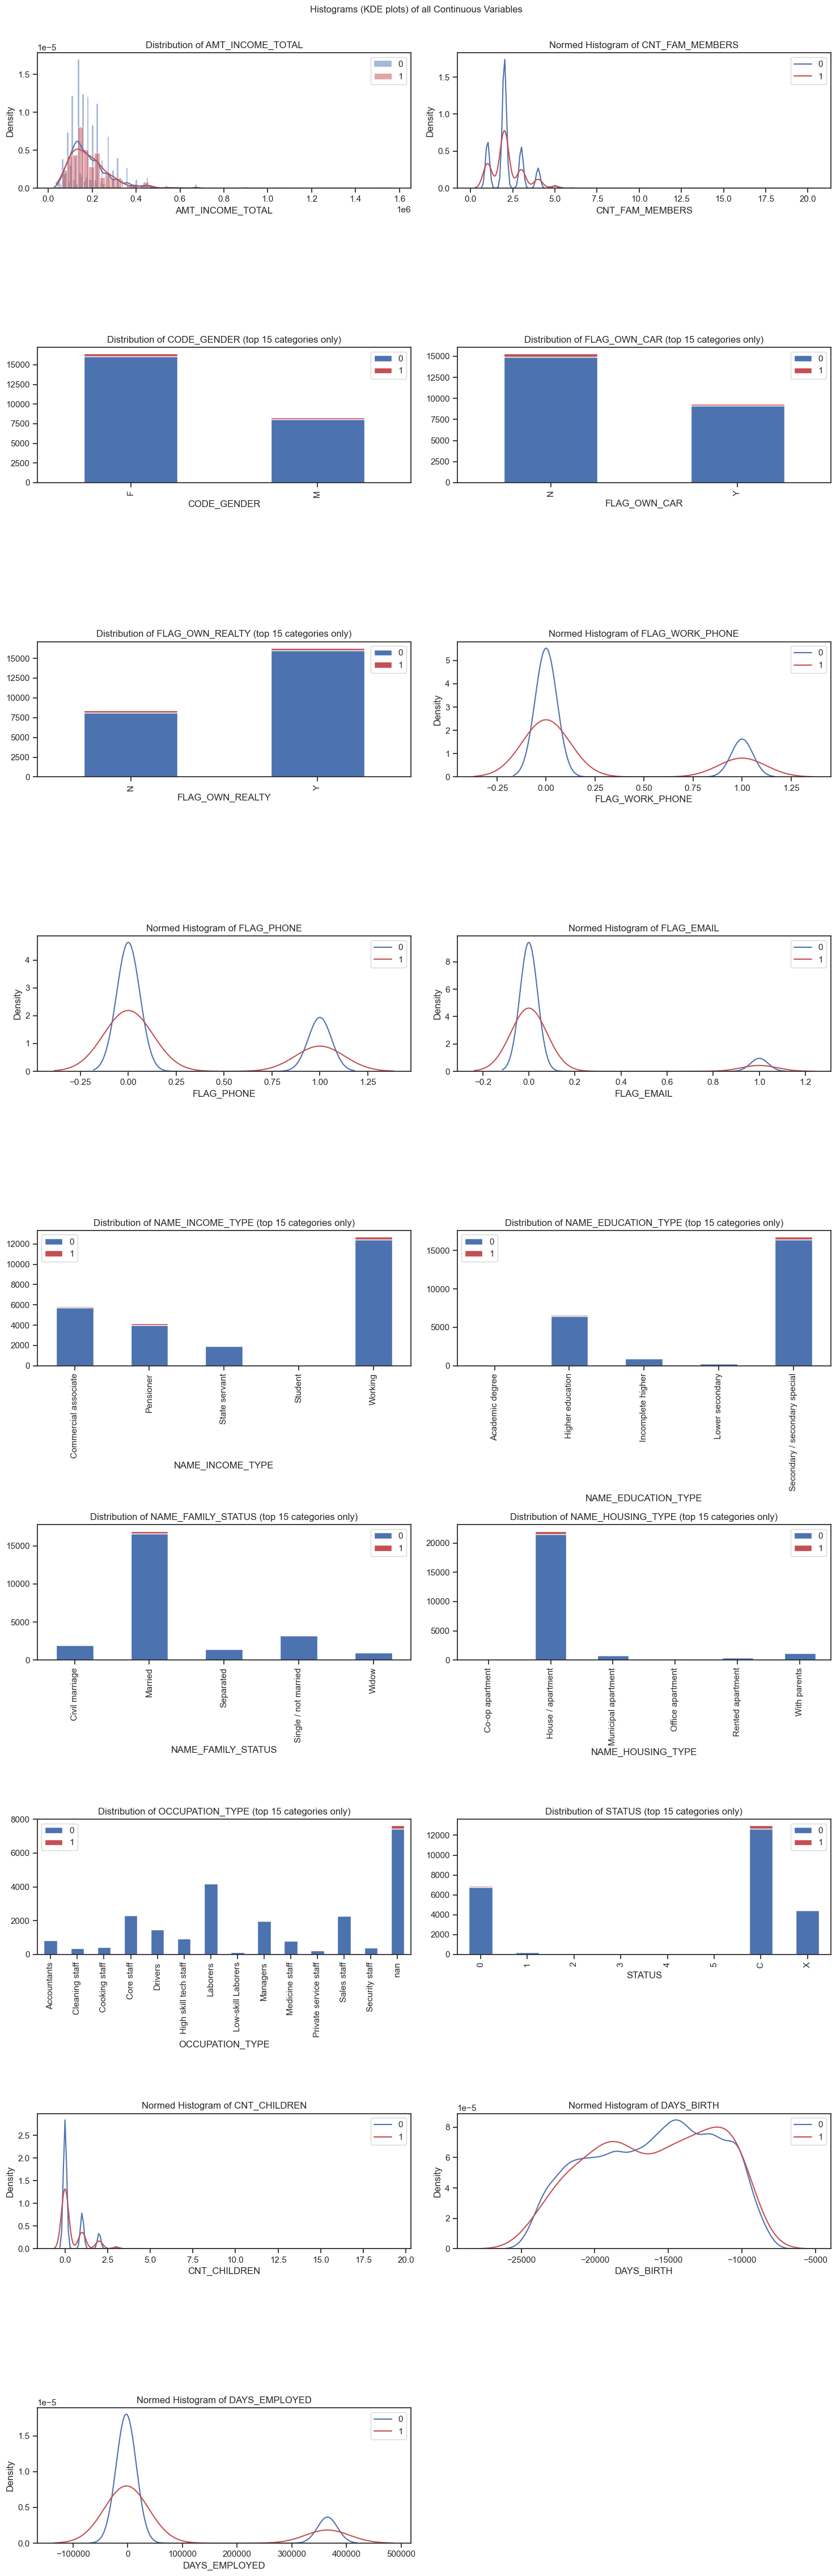

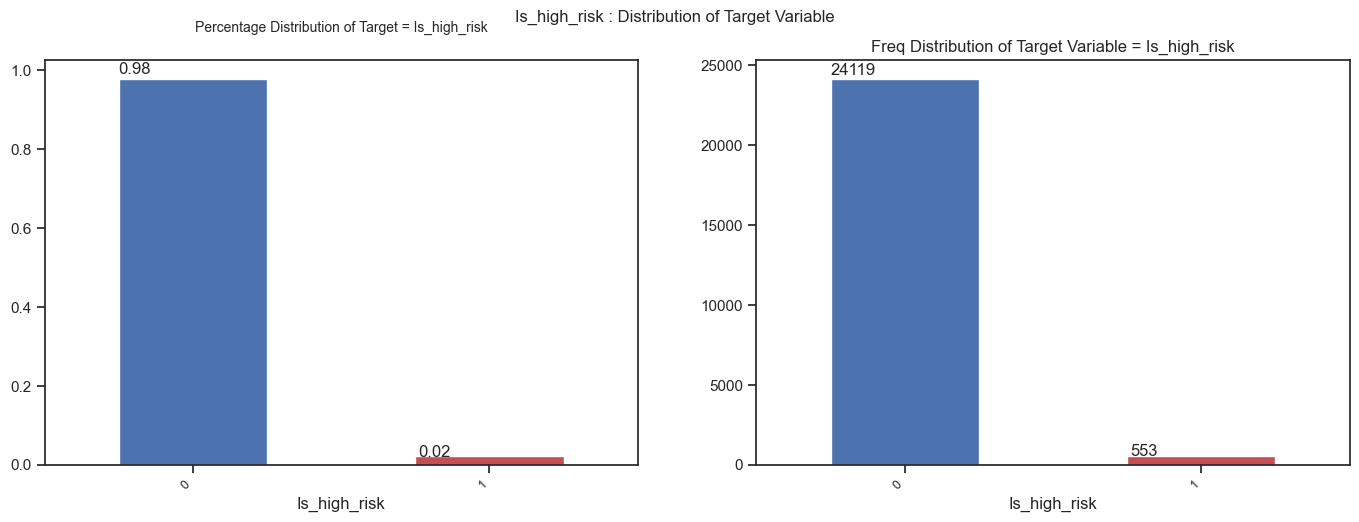

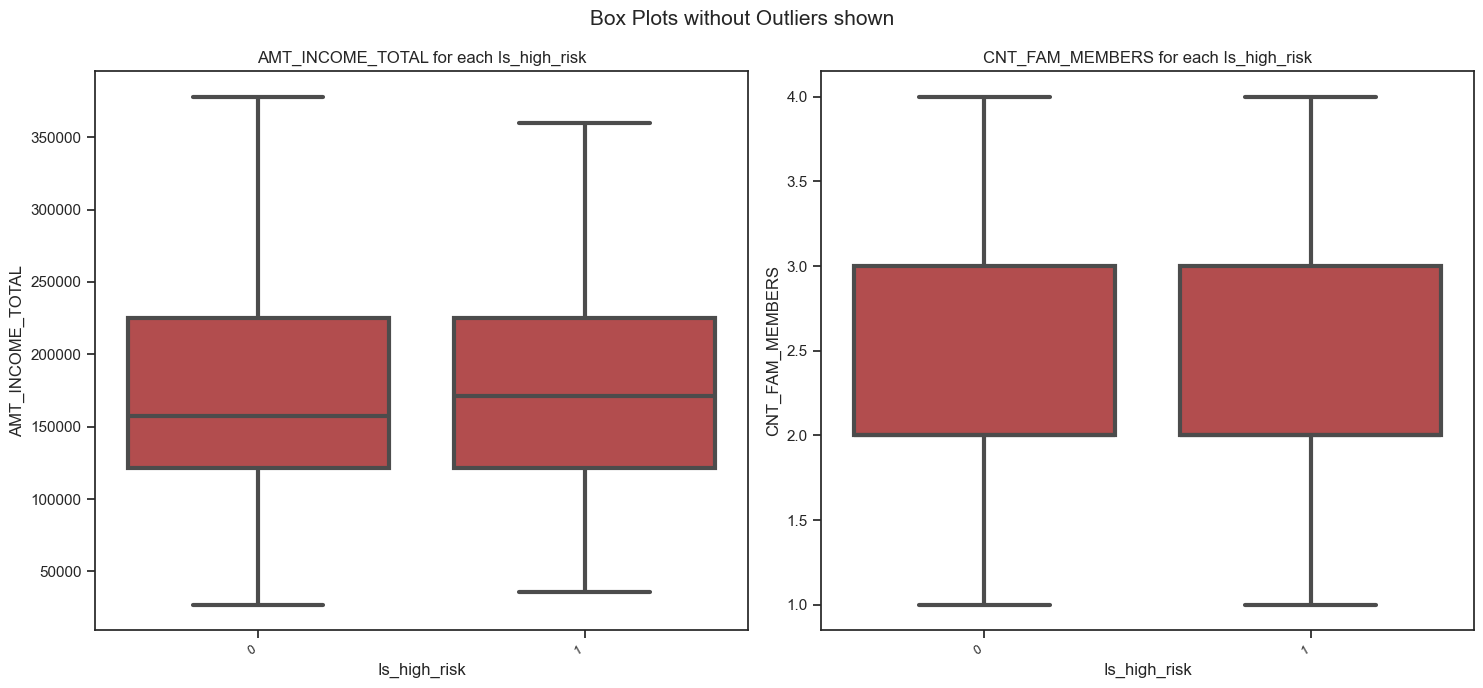

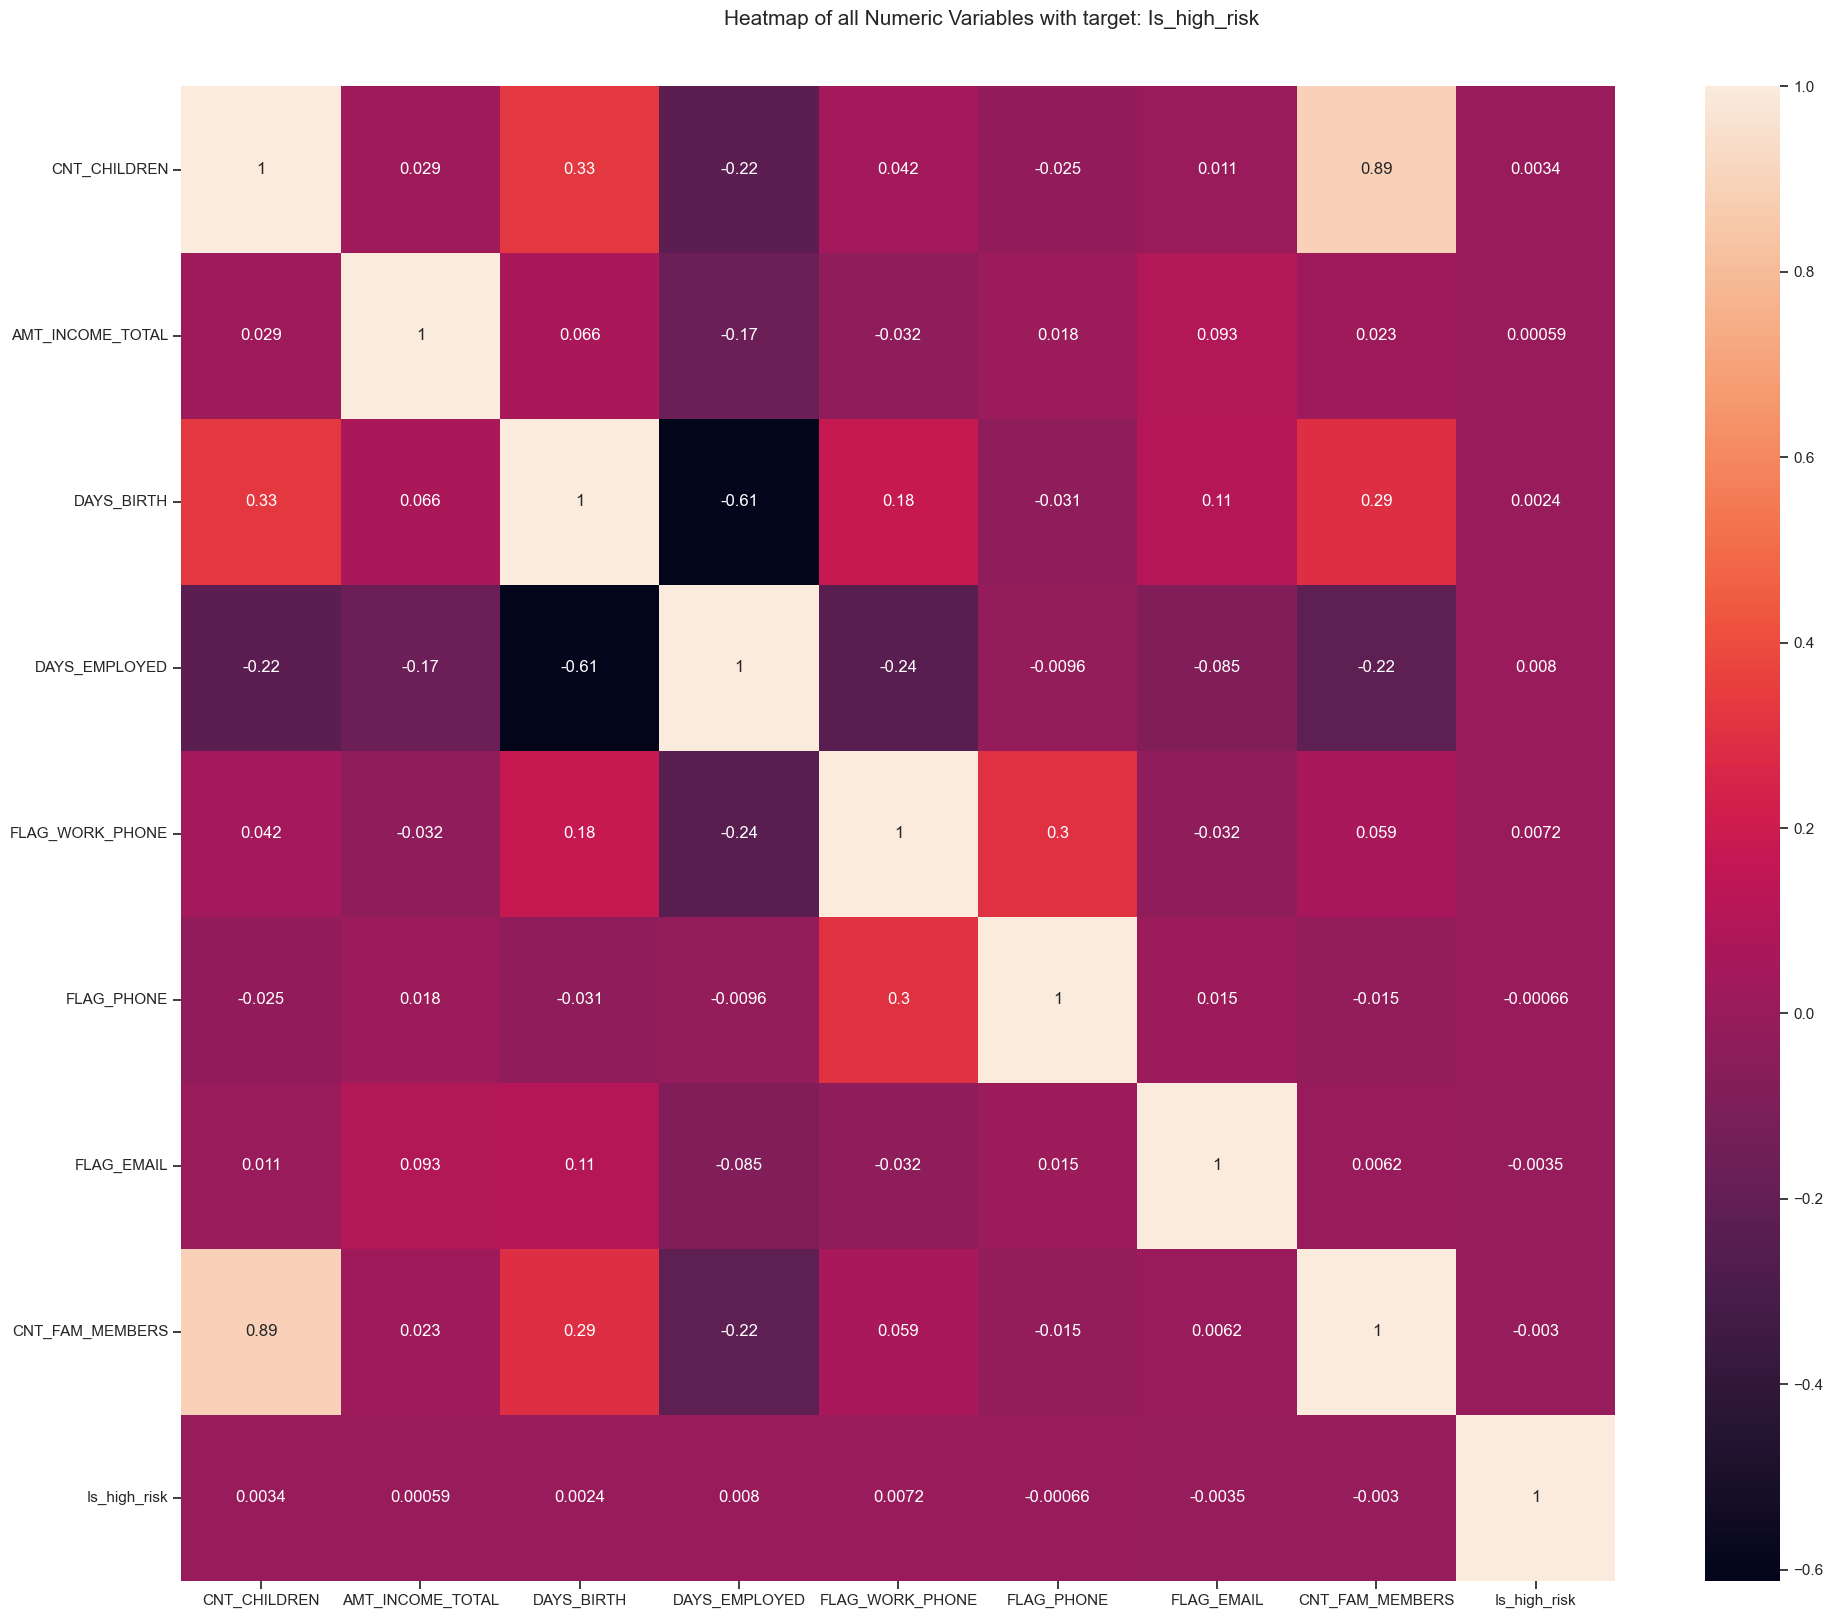

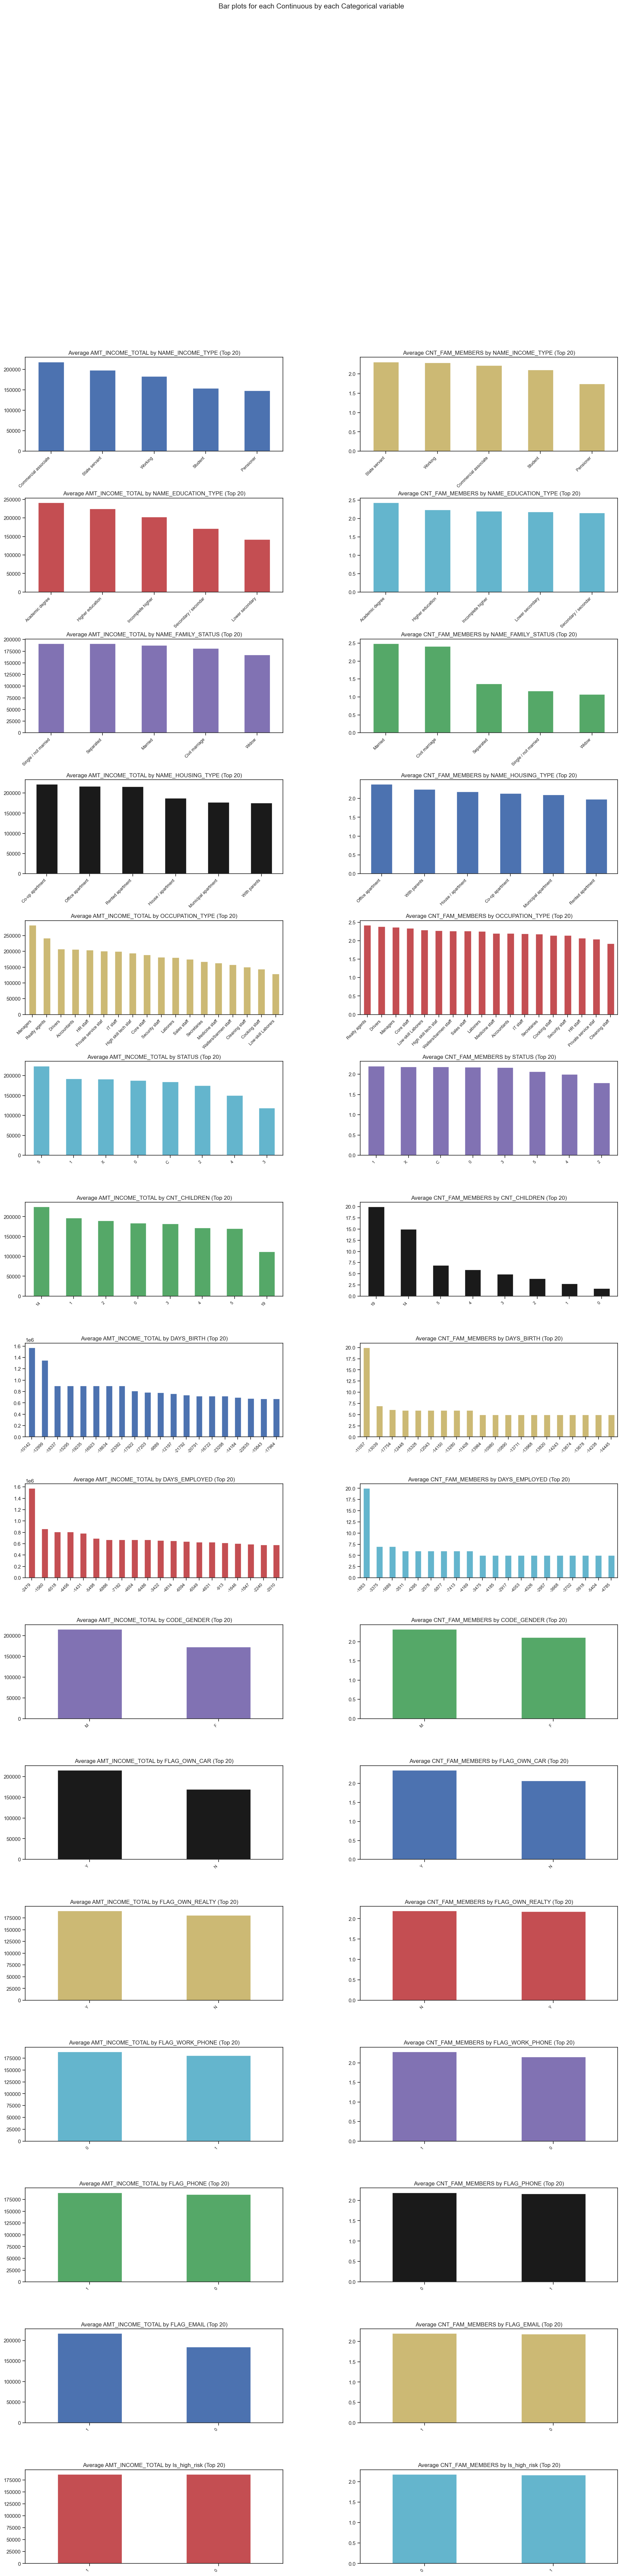

In [44]:
# Autoviz display
%matplotlib inline
AV = AutoViz_Class()
dfte = AV.AutoViz(filename="", sep=',', depVar='Is_high_risk', dfte=merged_df, header=0, verbose=2, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir="reports_html")

In [45]:
#autoviz report to html
generate_autoviz_html_report(folder_name="reports_html/Is_high_risk", output_filename="credit_card_eda_report.html")

✅ AutoViz HTML report saved to: D:\portfolio\my_projects\DataAnalysis\notebooks\reports_html\Is_high_risk\credit_card_eda_report.html


'D:\\portfolio\\my_projects\\DataAnalysis\\notebooks\\reports_html\\Is_high_risk\\credit_card_eda_report.html'

| **Column**            | **DQ Issues**                                                                                                                                                                                                 |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **CNT_CHILDREN**        | - **Outliers**: 205 values outside bounds [-1.50, 2.50]. Cap/remove.<br>- **High Correlation**: Correlated with `CNT_FAM_MEMBERS`. Drop one.                                                                 |
| **AMT_INCOME_TOTAL**    | - **Outliers**: 496 values outside bounds [-45,000, 387,000]. Cap/remove.                                                                                                                                    |
| **NAME_INCOME_TYPE**    | - **Rare Categories**: `Student` (low frequency). Group/drop.                                                                                                                                                |
| **NAME_EDUCATION_TYPE** | - **Rare Categories**: `Academic degree` (low frequency). Group/drop.                                                                                                                                        |
| **NAME_HOUSING_TYPE**   | - **Rare Categories**: `Office apartment`, `Co-op apartment` (low frequency). Group/drop.                                                                                                                    |
| **DAYS_EMPLOYED**       | - **Outliers**: 3,011 values outside bounds [-7,086, 3,666]. Cap/remove.                                                                                                                                    |
| **OCCUPATION_TYPE**     | - **Missing Values**: 30.73% missing (4,157 entries). Impute with mode/constant.<br>- **Rare Categories**: 6 rare categories (e.g., `HR staff`, `Realty agents`). Group/drop.<br>- **Mixed Data Types**: Float and object. |
| **CNT_FAM_MEMBERS**     | - **Outliers**: 195 values outside bounds [0.50, 4.50]. Cap/remove.                                                                                                                                         |
| **STATUS**              | - **Rare Categories**: `2`, `3`, `4`, `5` (low frequency). Group/drop.                                                                                                                                      |
| **Is_high_risk**        | - **Class Imbalance**: Target column imbalance. Use resampling/class weights.                                                                                                                               |

In [1]:
# streamlit

In [ ]:
import streamlit as st
import eda
import prediction

page = st.sidebar.selectbox('Pilih Halaman', ('EDA', 'Prediction'))

if page=='EDA':
    eda.run()
else:
    prediction.run()

In [ ]:
import streamlit as st
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

def run():

    #Membuat judul
    st.title('Credit Card Analysis and Prediction')

    image = Image.open('credit_card.jpeg')
    st.image(image, caption='Credit Card')

    st.markdown('------')

    #Sub judul untuk Exploratory Data Analysis
    st.subheader('Exploratory Data Analysis Credit Card')

    #Memanggil dataset
    credit_card_data = pd.read_csv('P1G5_Set_1_Christopher.csv')
    credit_card_data

    st.write("#### Penggunaan Credit Card berdasarkan Age")
    fig = plt.figure(figsize=(20, 15))
    sns.countplot(credit_card_data, x="age")
    st.pyplot(fig)

    st.write("#### Limit Balance menurut Education Level")
    limit_by_education = credit_card_data.groupby('education_level')['limit_balance'].sum().sort_values(ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.bar(limit_by_education.education_level, limit_by_education.limit_balance, label=limit_by_education.limit_balance)

    ax.set_ylabel('Education Level')
    ax.set_title('Limit Balance')
    ax.legend(title='Limit Balance menurut Education Level')
    st.pyplot(fig, ax)

    st.write("#### Limit Balance menurut Age")
    limit_by_age = credit_card_data.groupby('age')['limit_balance'].sum().sort_values(ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.bar(limit_by_age.age, limit_by_age.limit_balance)

    ax.set_ylabel('Education Level')
    ax.set_title('Limit Balance')
    ax.legend(title='Limit Balance menurut Education Level')
    st.pyplot(fig, ax)

if __name__ == "__main__":
    run()

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import json
import pickle
from sklearn import *

with open('best_models_knc.pkl', 'rb') as file_3:
  knc_model = pickle.load(file_3)

with open('best_models_svc.pkl', 'rb') as file_6:
  svc_model = pickle.load(file_6)

with open('best_models_logreg.pkl', 'rb') as file_7:
  logreg_model = pickle.load(file_7)

def run():
    st.title('Prediction Credit Card Default or Not')

    with st.form('form_credit_card'):
       limit_balance = st.slider('Limit Balance', min_value = 0, max_value = 500000, value = 150000, help='Slide limit balance anda')
       pay_amt_1 = st.slider('Input Payment 1', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah payment pertama anda')
       pay_amt_2 = st.slider('Input Payment 2', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah payment kedua anda')
       pay_amt_3 = st.slider('Input Payment 3', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah payment ketiga anda')
       pay_amt_4 = st.slider('Input Payment 4', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah payment keempat anda')
       pay_amt_5 = st.slider('Input Payment 5', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah payment kelima anda')
       pay_amt_6 = st.slider('Input Payment 6', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah payment keenam anda')
       education_level = st.slider('Education Level', min_value = 0, max_value = 6, value = 3, help='Slide education level anda')
       pay_0 = st.slider('Input Payment 1', min_value = -2, max_value = 9, value = 3, help='Slide status payment pertama anda')
       pay_2 = st.slider('Input Payment 2', min_value = -2, max_value = 9, value = 3, help='Slide status payment kedua anda')
       pay_3 = st.slider('Input Payment 3', min_value = -2, max_value = 9, value = 3, help='Slide status payment ketiga anda')
       pay_4 = st.slider('Input Payment 4', min_value = -2, max_value = 9, value = 3, help='Slide status payment keempat anda')
       pay_5 = st.slider('Input Payment 5', min_value = -2, max_value = 9, value = 3, help='Slide status payment kelima anda')
       pay_6 = st.slider('Input Payment 6', min_value = -2, max_value = 9, value = 3, help='Slide status payment keenam anda')
       bill_amt_1 = st.slider('Input Jumlah Tagihan 1', min_value = 0, max_value = 500000, value = 150000, help='Slide jumlah tagihan pertama anda')
       bill_amt_2 = st.slider('Input Jumlah Tagihan 2', min_value = 0, max_value = 500000, value = 150000, help='Slide jumlah tagihan kedua anda')
       bill_amt_3 = st.slider('Input Jumlah Tagihan 3', min_value = 0, max_value = 500000, value = 150000, help='Slide jumlah tagihan ketiga anda')
       bill_amt_4 = st.slider('Input Jumlah Tagihan 4', min_value = 0, max_value = 500000, value = 150000, help='Slide jumlah tagihan keempat anda')
       bill_amt_5 = st.slider('Input Jumlah Tagihan 5', min_value = 0, max_value = 500000, value = 150000, help='Slide jumlah tagihan kelima anda')
       bill_amt_6 = st.slider('Input Jumlah Tagihan 6', min_value = 0, max_value = 300000, value = 150000, help='Slide jumlah tagihan keenam anda')

       #submit button
       submitted = st.form_submit_button('Predict')

    data_inf = {
    "limit_balance"  :               limit_balance,
    "pay_amt_1"      :                pay_amt_1,
    "pay_amt_2"      :                pay_amt_2,
    "pay_amt_3"      :                pay_amt_3,
    "pay_amt_4"      :                pay_amt_4,
    "pay_amt_5"      :                pay_amt_5,
    "pay_amt_6"      :                pay_amt_6,
    "education_level":          education_level,
    "pay_0"          :                   pay_0,
    "pay_2"          :                   pay_2,
    "pay_3"          :                   pay_3,
    "pay_4"          :                   pay_4,
    "pay_5"          :                   pay_5,
    "pay_6"          :                   pay_6,
    "bill_amt_1"     :               bill_amt_1,
    "bill_amt_2"     :               bill_amt_2,
    "bill_amt_3"     :               bill_amt_3,
    "bill_amt_4"     :               bill_amt_4,
    "bill_amt_5"     :               bill_amt_5,
    "bill_amt_6"     :               bill_amt_6
    }       

    data_inf = pd.DataFrame([data_inf])
    data_inf

    if submitted:

        y_pred_inf = logreg_model.predict(data_inf)
        y_pred_inf

        st.write('### Default Payment Next Month: ', str(int(y_pred_inf)))


if __name__ == "__main__":
    run()